In [2]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


### Build a line plot about bird wingspan values

<Axes: >

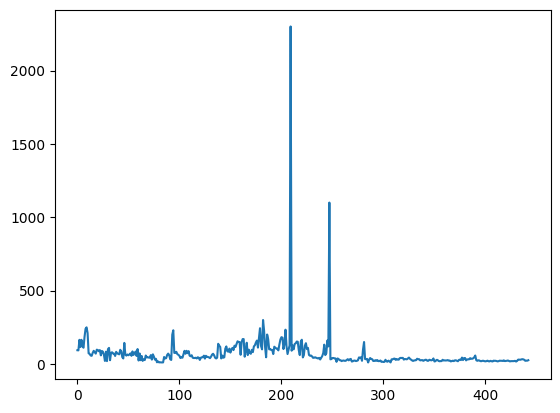

In [3]:
wingspan = birds['MaxWingspan'] 
wingspan.plot()

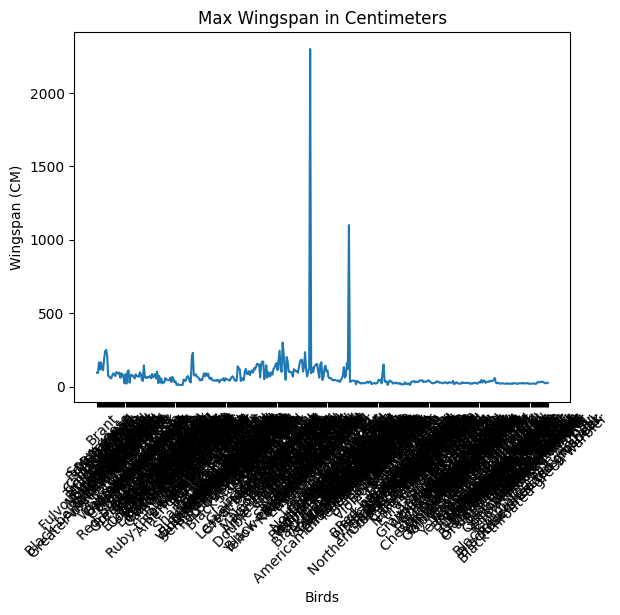

In [4]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

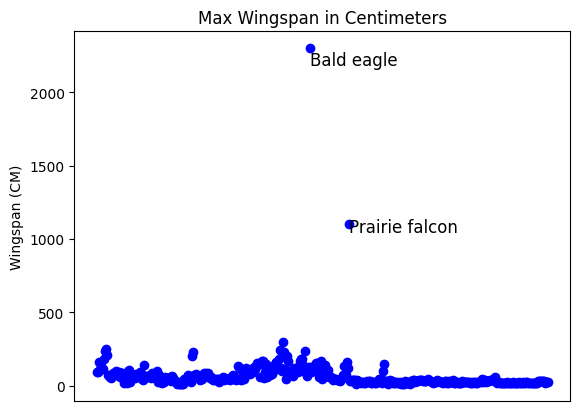

In [5]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()

### Filter your data

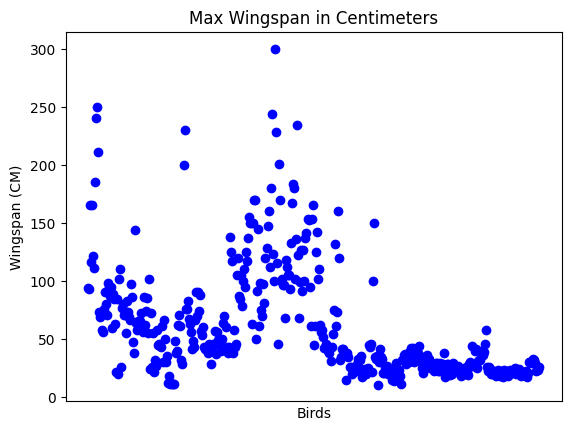

In [6]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()

### Explore bar charts

<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Category'>

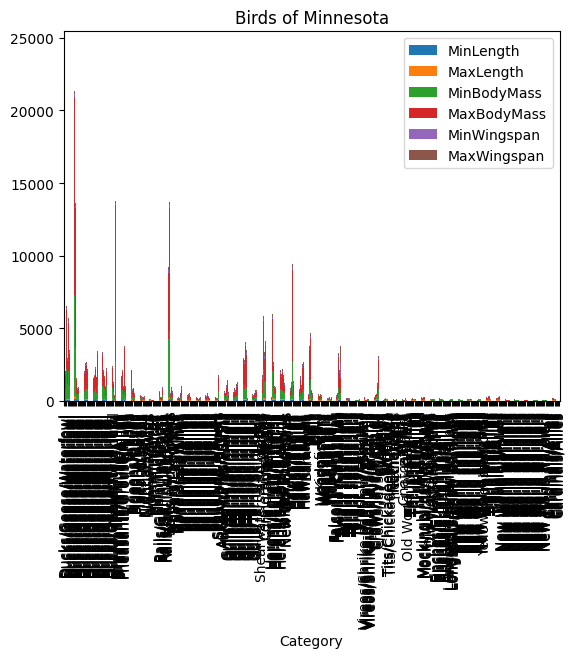

In [7]:
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')


<Axes: >

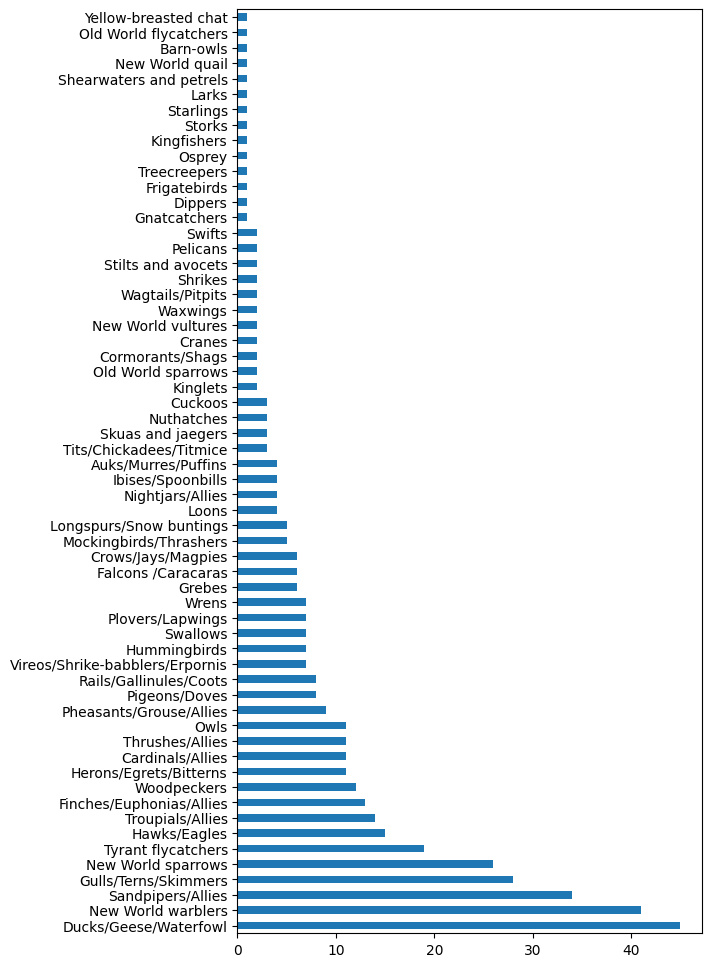

In [8]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

### Comparing data

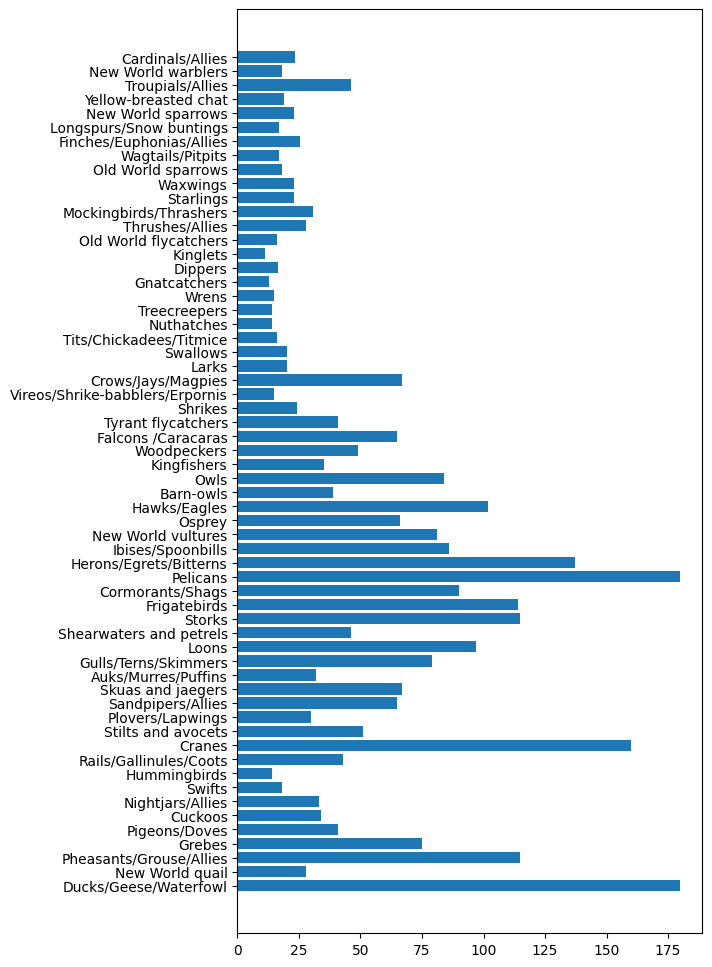

In [9]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

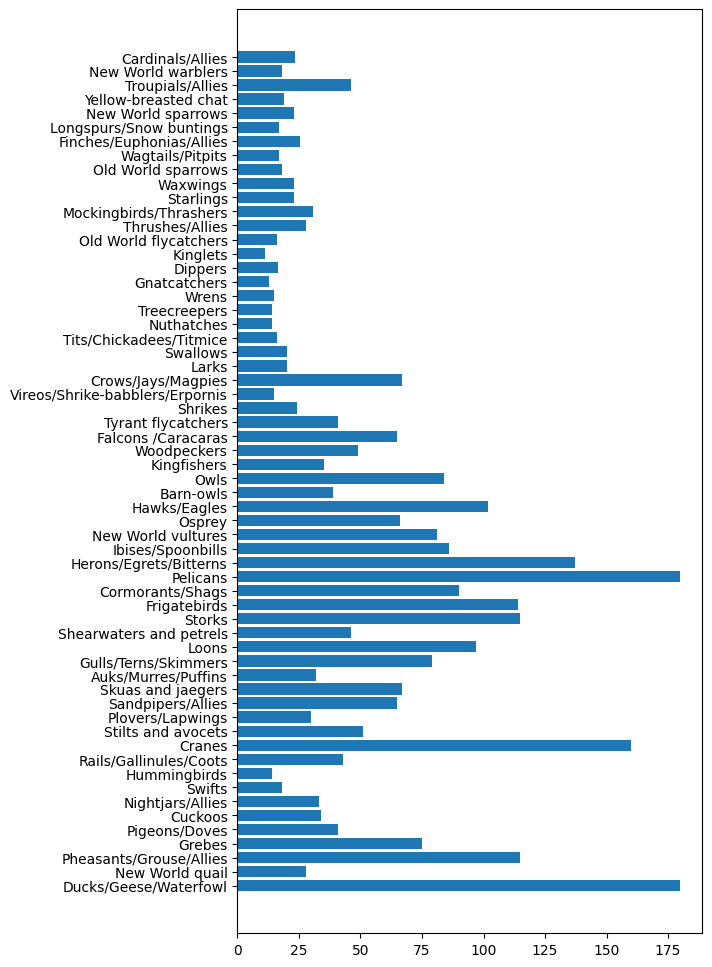

In [10]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

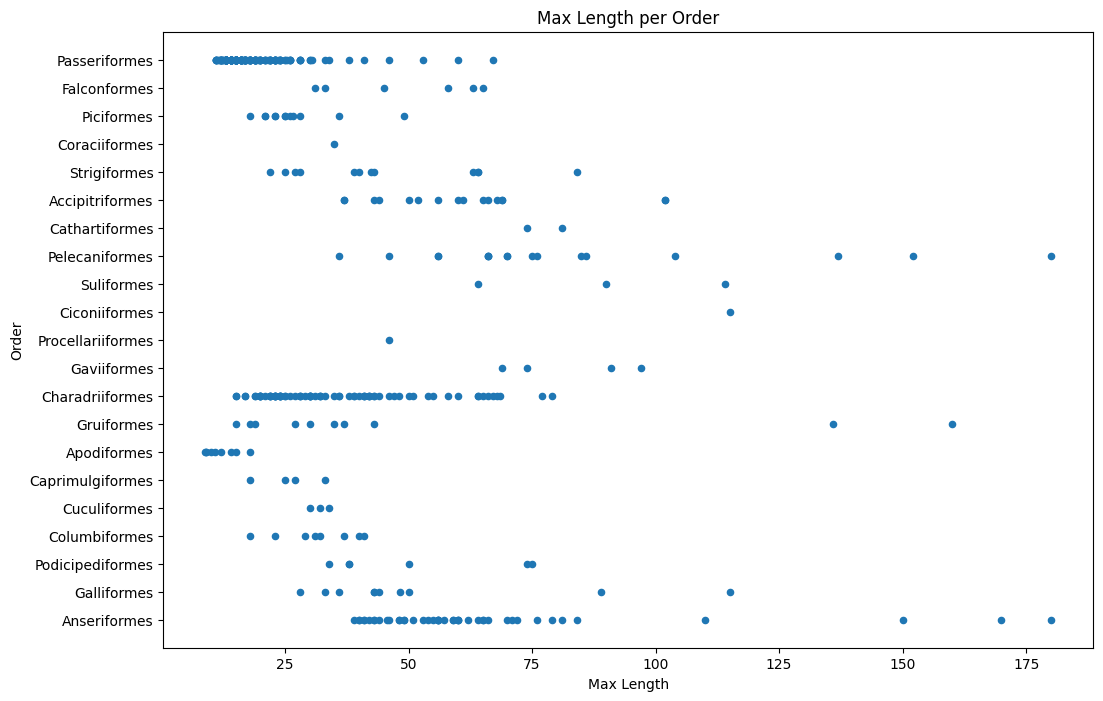

In [11]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

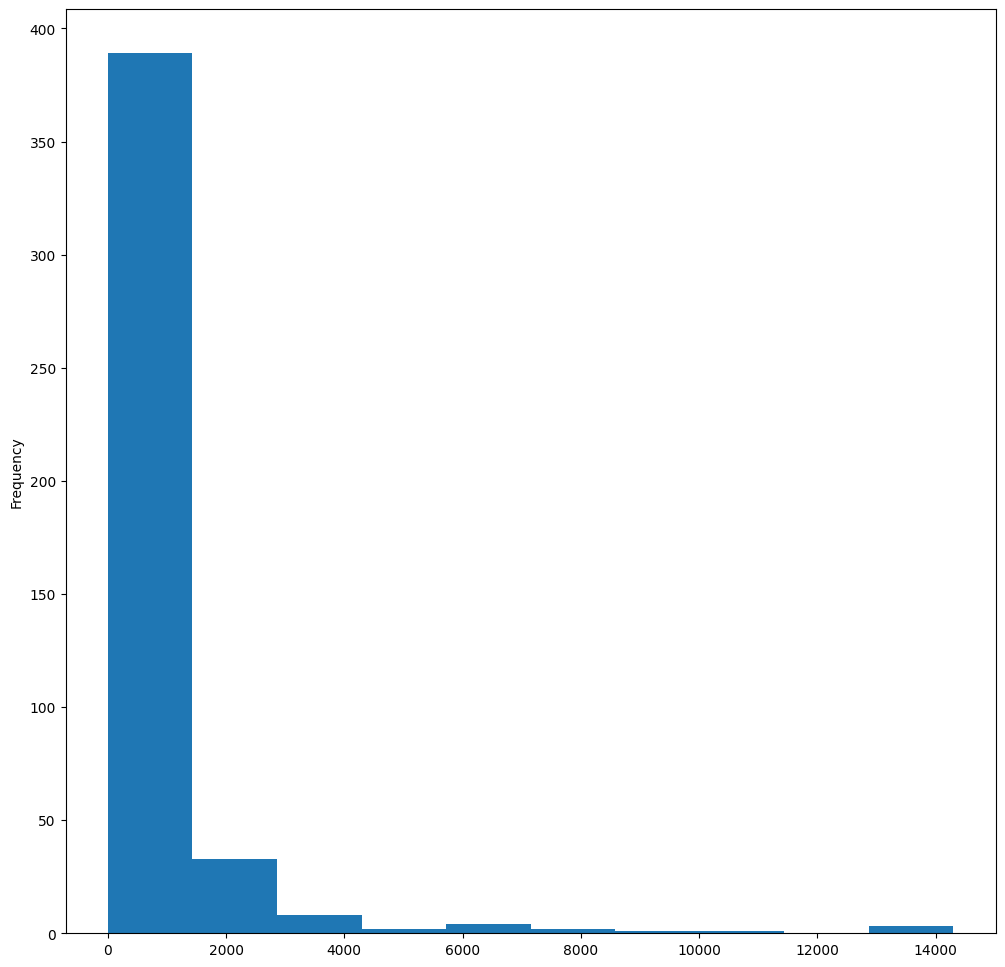

In [12]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

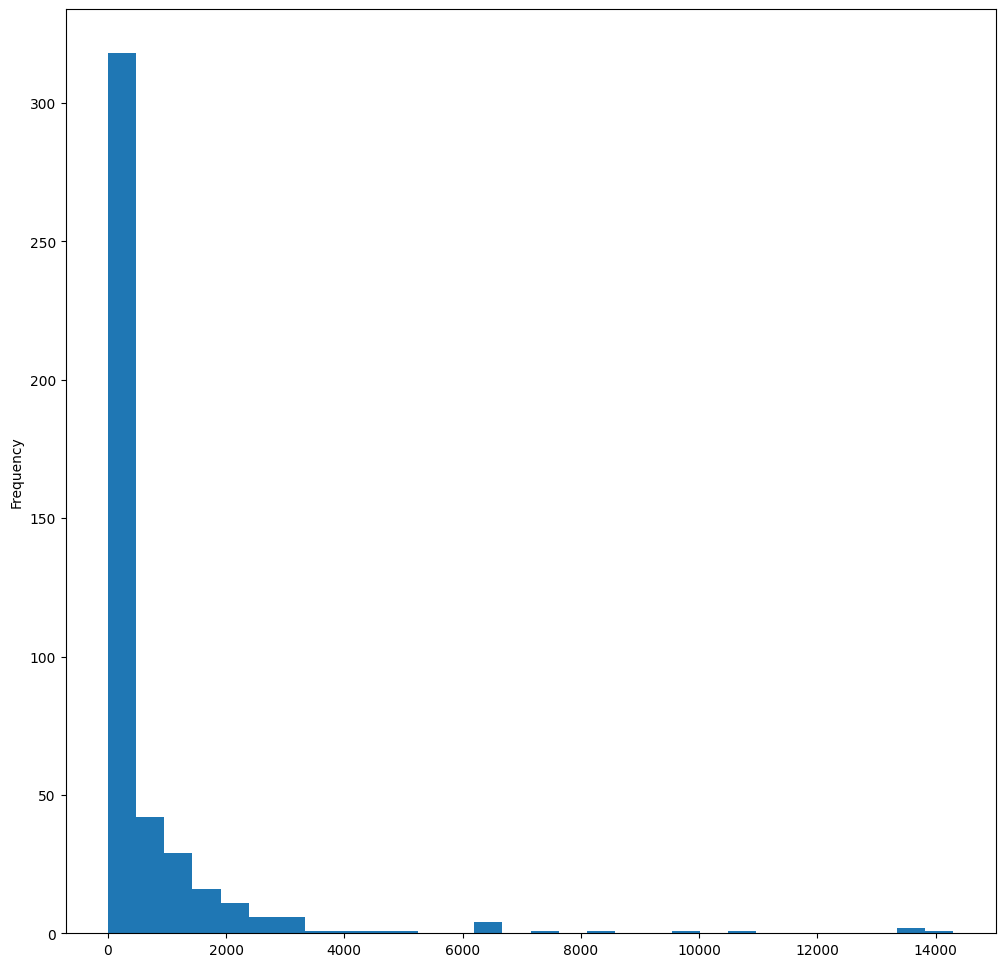

In [13]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

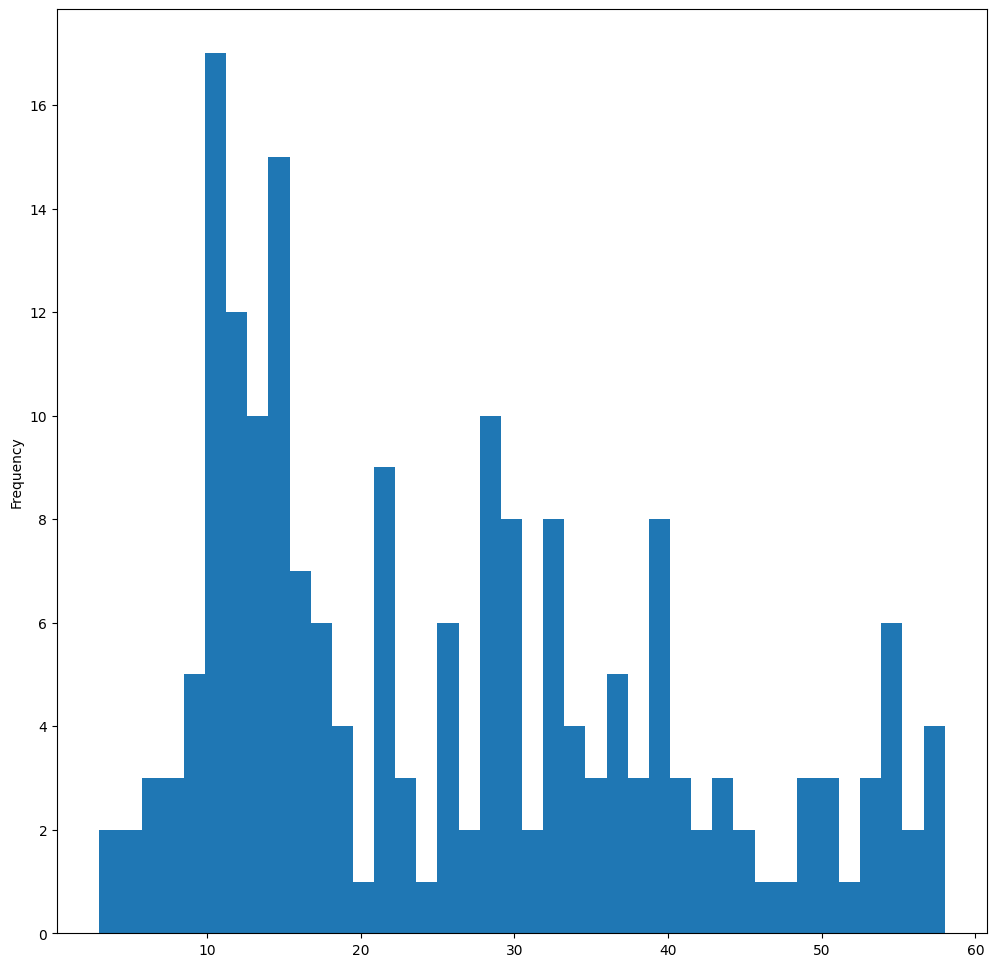

In [14]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()    

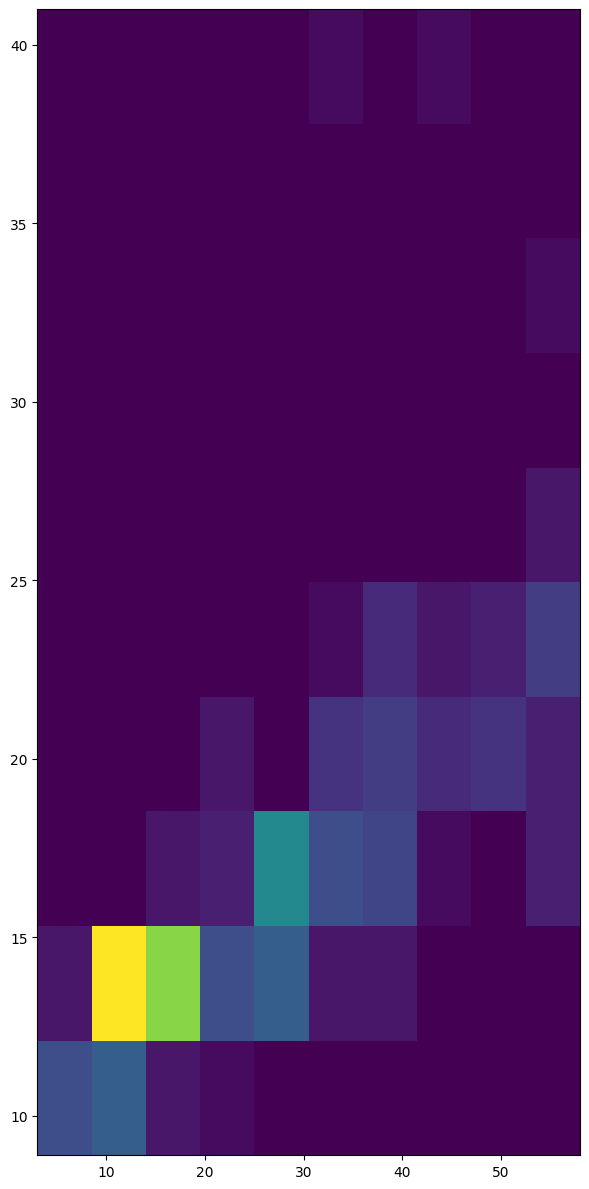

In [15]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

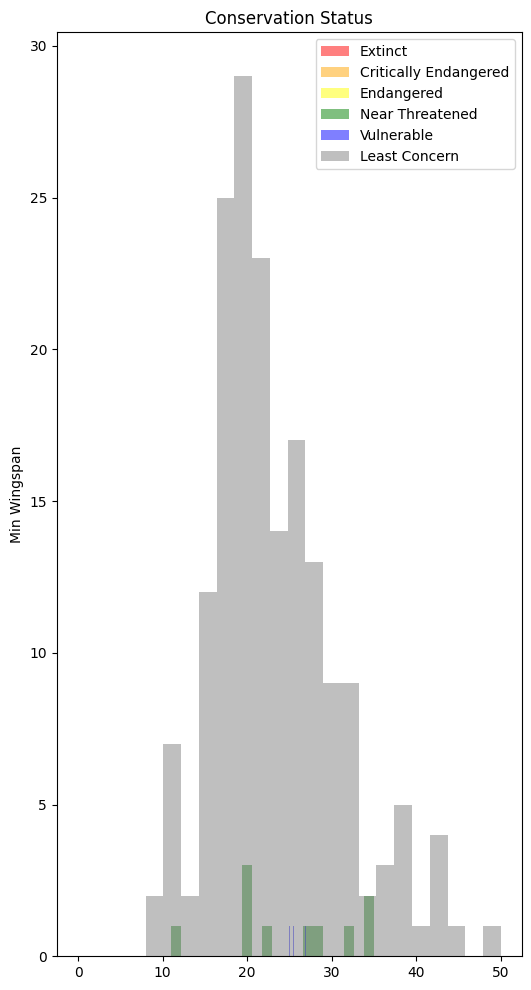

In [17]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()

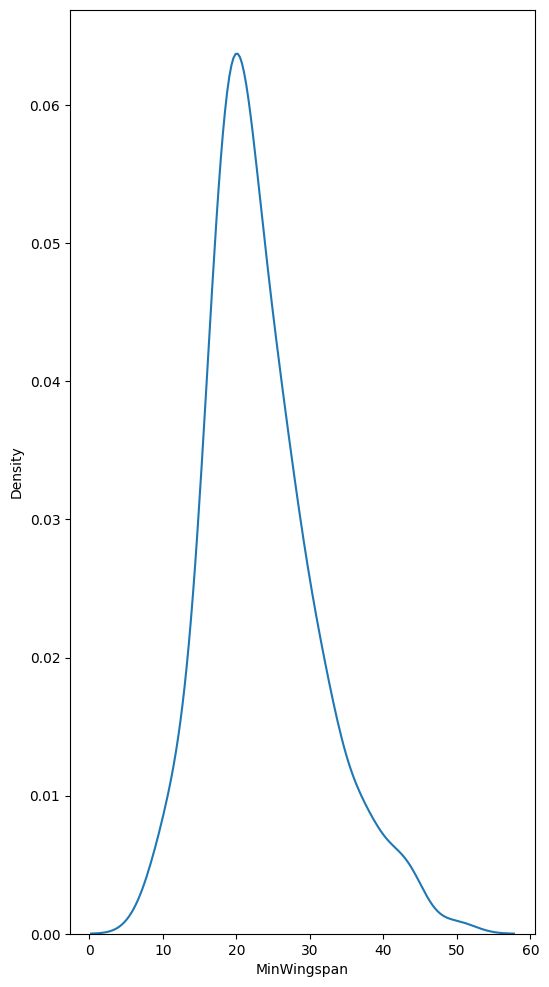

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

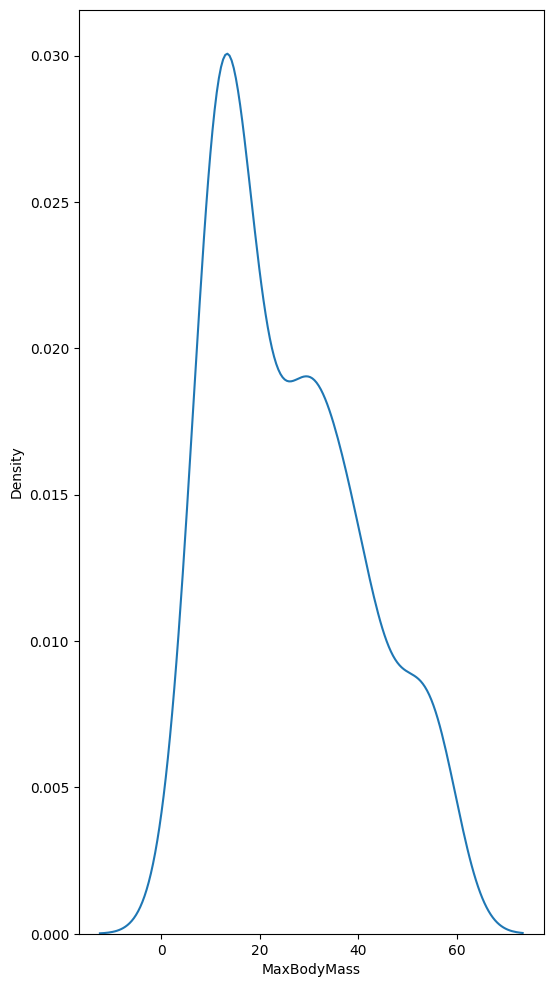

In [21]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

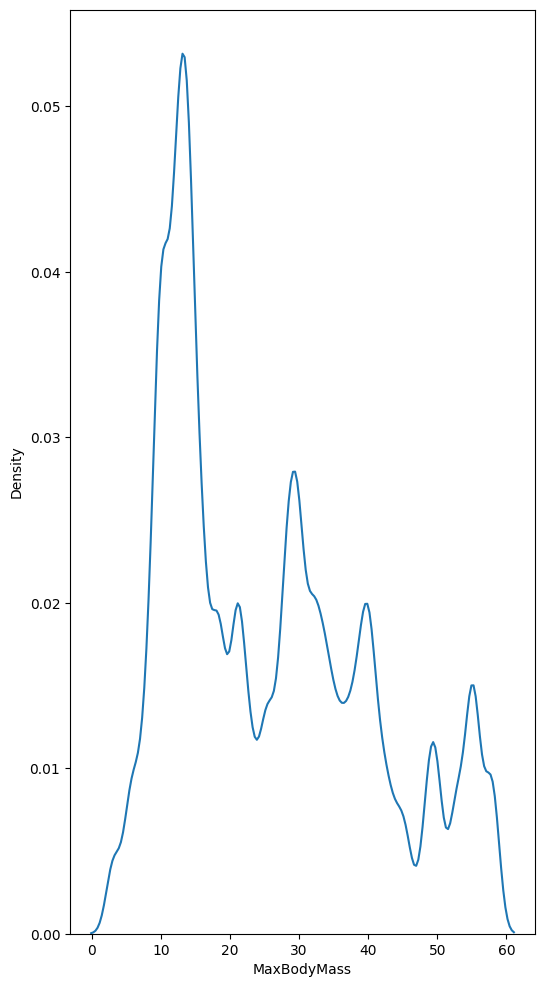

In [22]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

/tmp/ipykernel_3069/1933666654.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='MaxBodyMass', ylabel='Density'>

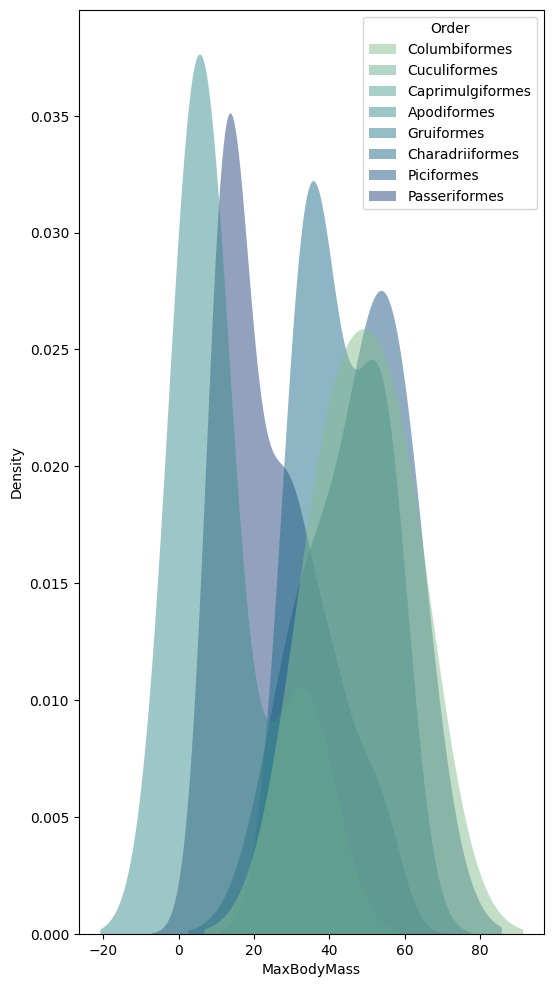

In [23]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

/tmp/ipykernel_3069/49960699.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")


<Axes: xlabel='MinLength', ylabel='MaxLength'>

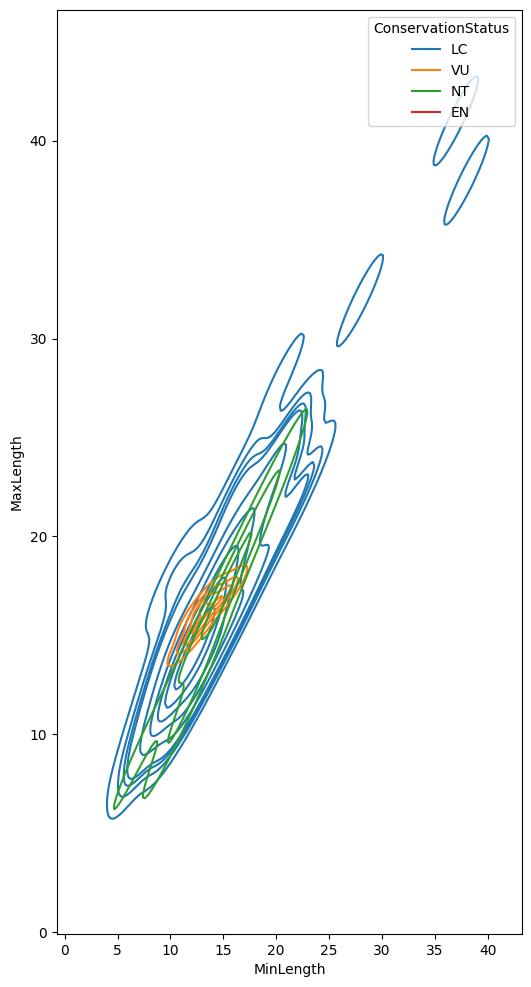

In [24]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,NaN,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [2]:
print(mushrooms.select_dtypes(["object"]).columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [3]:
cols = mushrooms.select_dtypes(["object"]).columns
mushrooms[cols] = mushrooms[cols].astype('category')

In [4]:
edibleclass=mushrooms.groupby(['class']).count()
edibleclass

/tmp/ipykernel_2406/4107208836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edibleclass=mushrooms.groupby(['class']).count()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
Edible,4208,4208,4208,4208,800,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
Poisonous,3916,3916,3916,3916,3796,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3880,3880,3916,3916,3916


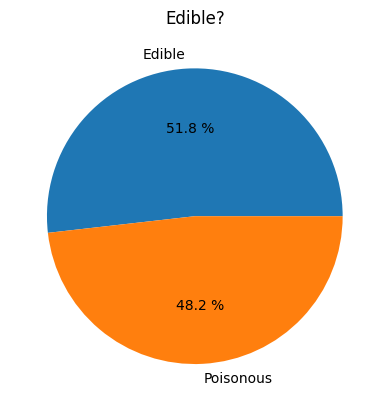

In [5]:
labels=['Edible','Poisonous']
plt.pie(edibleclass['population'],labels=labels,autopct='%.1f %%')
plt.title('Edible?')
plt.show()

In [6]:
habitat=mushrooms.groupby(['habitat']).count()
habitat

/tmp/ipykernel_2406/1821066925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  habitat=mushrooms.groupby(['habitat']).count()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
habitat,,,,,,,,,,,,,,,,,,,,,
Grasses,2148,2148,2148,2148,2148,1056,2148,2148,2148,2148,...,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Leaves,832,832,832,832,832,576,832,832,832,832,...,832,832,832,832,832,832,832,832,832,832
Meadows,292,292,292,292,292,256,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Paths,1144,1144,1144,1144,1144,1104,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
Urban,368,368,368,368,368,272,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
Waste,192,192,192,192,192,0,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
Wood,3148,3148,3148,3148,3148,1332,3148,3148,3148,3148,...,3148,3148,3148,3148,3148,3148,3112,3112,3148,3148


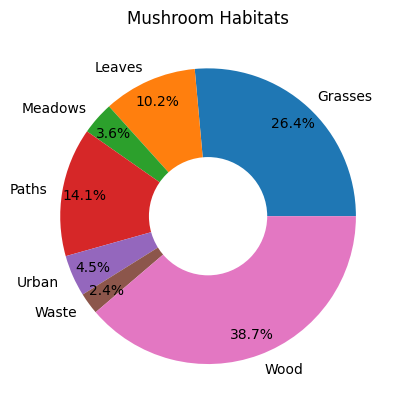

In [7]:
labels=['Grasses','Leaves','Meadows','Paths','Urban','Waste','Wood']

plt.pie(habitat['class'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Mushroom Habitats')
  
plt.show()

In [8]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 2.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
capcolor=mushrooms.groupby(['cap-color']).count()
capcolor

/tmp/ipykernel_2406/1606099690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  capcolor=mushrooms.groupby(['cap-color']).count()


,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-color,,,,,,,,,,,,,,,,,,,,,
Brown,2284,2284,2284,2284,1100,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2272,2272,2284,2284,2284
Buff,168,168,168,168,96,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
Cinnamon,44,44,44,44,12,44,44,44,44,44,...,44,44,44,44,44,32,32,44,44,44
Green,1856,1856,1856,1856,808,1856,1856,1856,1856,1856,...,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
Pink,144,144,144,144,64,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Purple,16,16,16,16,0,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Red,1500,1500,1500,1500,876,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1488,1488,1500,1500,1500
White,1040,1040,1040,1040,592,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
Yellow,1072,1072,1072,1072,1048,1072,1072,1072,1072,1072,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


In [10]:
capcolor=mushrooms.groupby(['cap-color']).count()
capcolor

/tmp/ipykernel_2406/1606099690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  capcolor=mushrooms.groupby(['cap-color']).count()


,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-color,,,,,,,,,,,,,,,,,,,,,
Brown,2284,2284,2284,2284,1100,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2272,2272,2284,2284,2284
Buff,168,168,168,168,96,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
Cinnamon,44,44,44,44,12,44,44,44,44,44,...,44,44,44,44,44,32,32,44,44,44
Green,1856,1856,1856,1856,808,1856,1856,1856,1856,1856,...,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856
Pink,144,144,144,144,64,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Purple,16,16,16,16,0,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Red,1500,1500,1500,1500,876,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1488,1488,1500,1500,1500
White,1040,1040,1040,1040,592,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
Yellow,1072,1072,1072,1072,1048,1072,1072,1072,1072,1072,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072


/home/msmaje/miniconda3/envs/deep_learning/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/msmaje/miniconda3/envs/deep_learning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


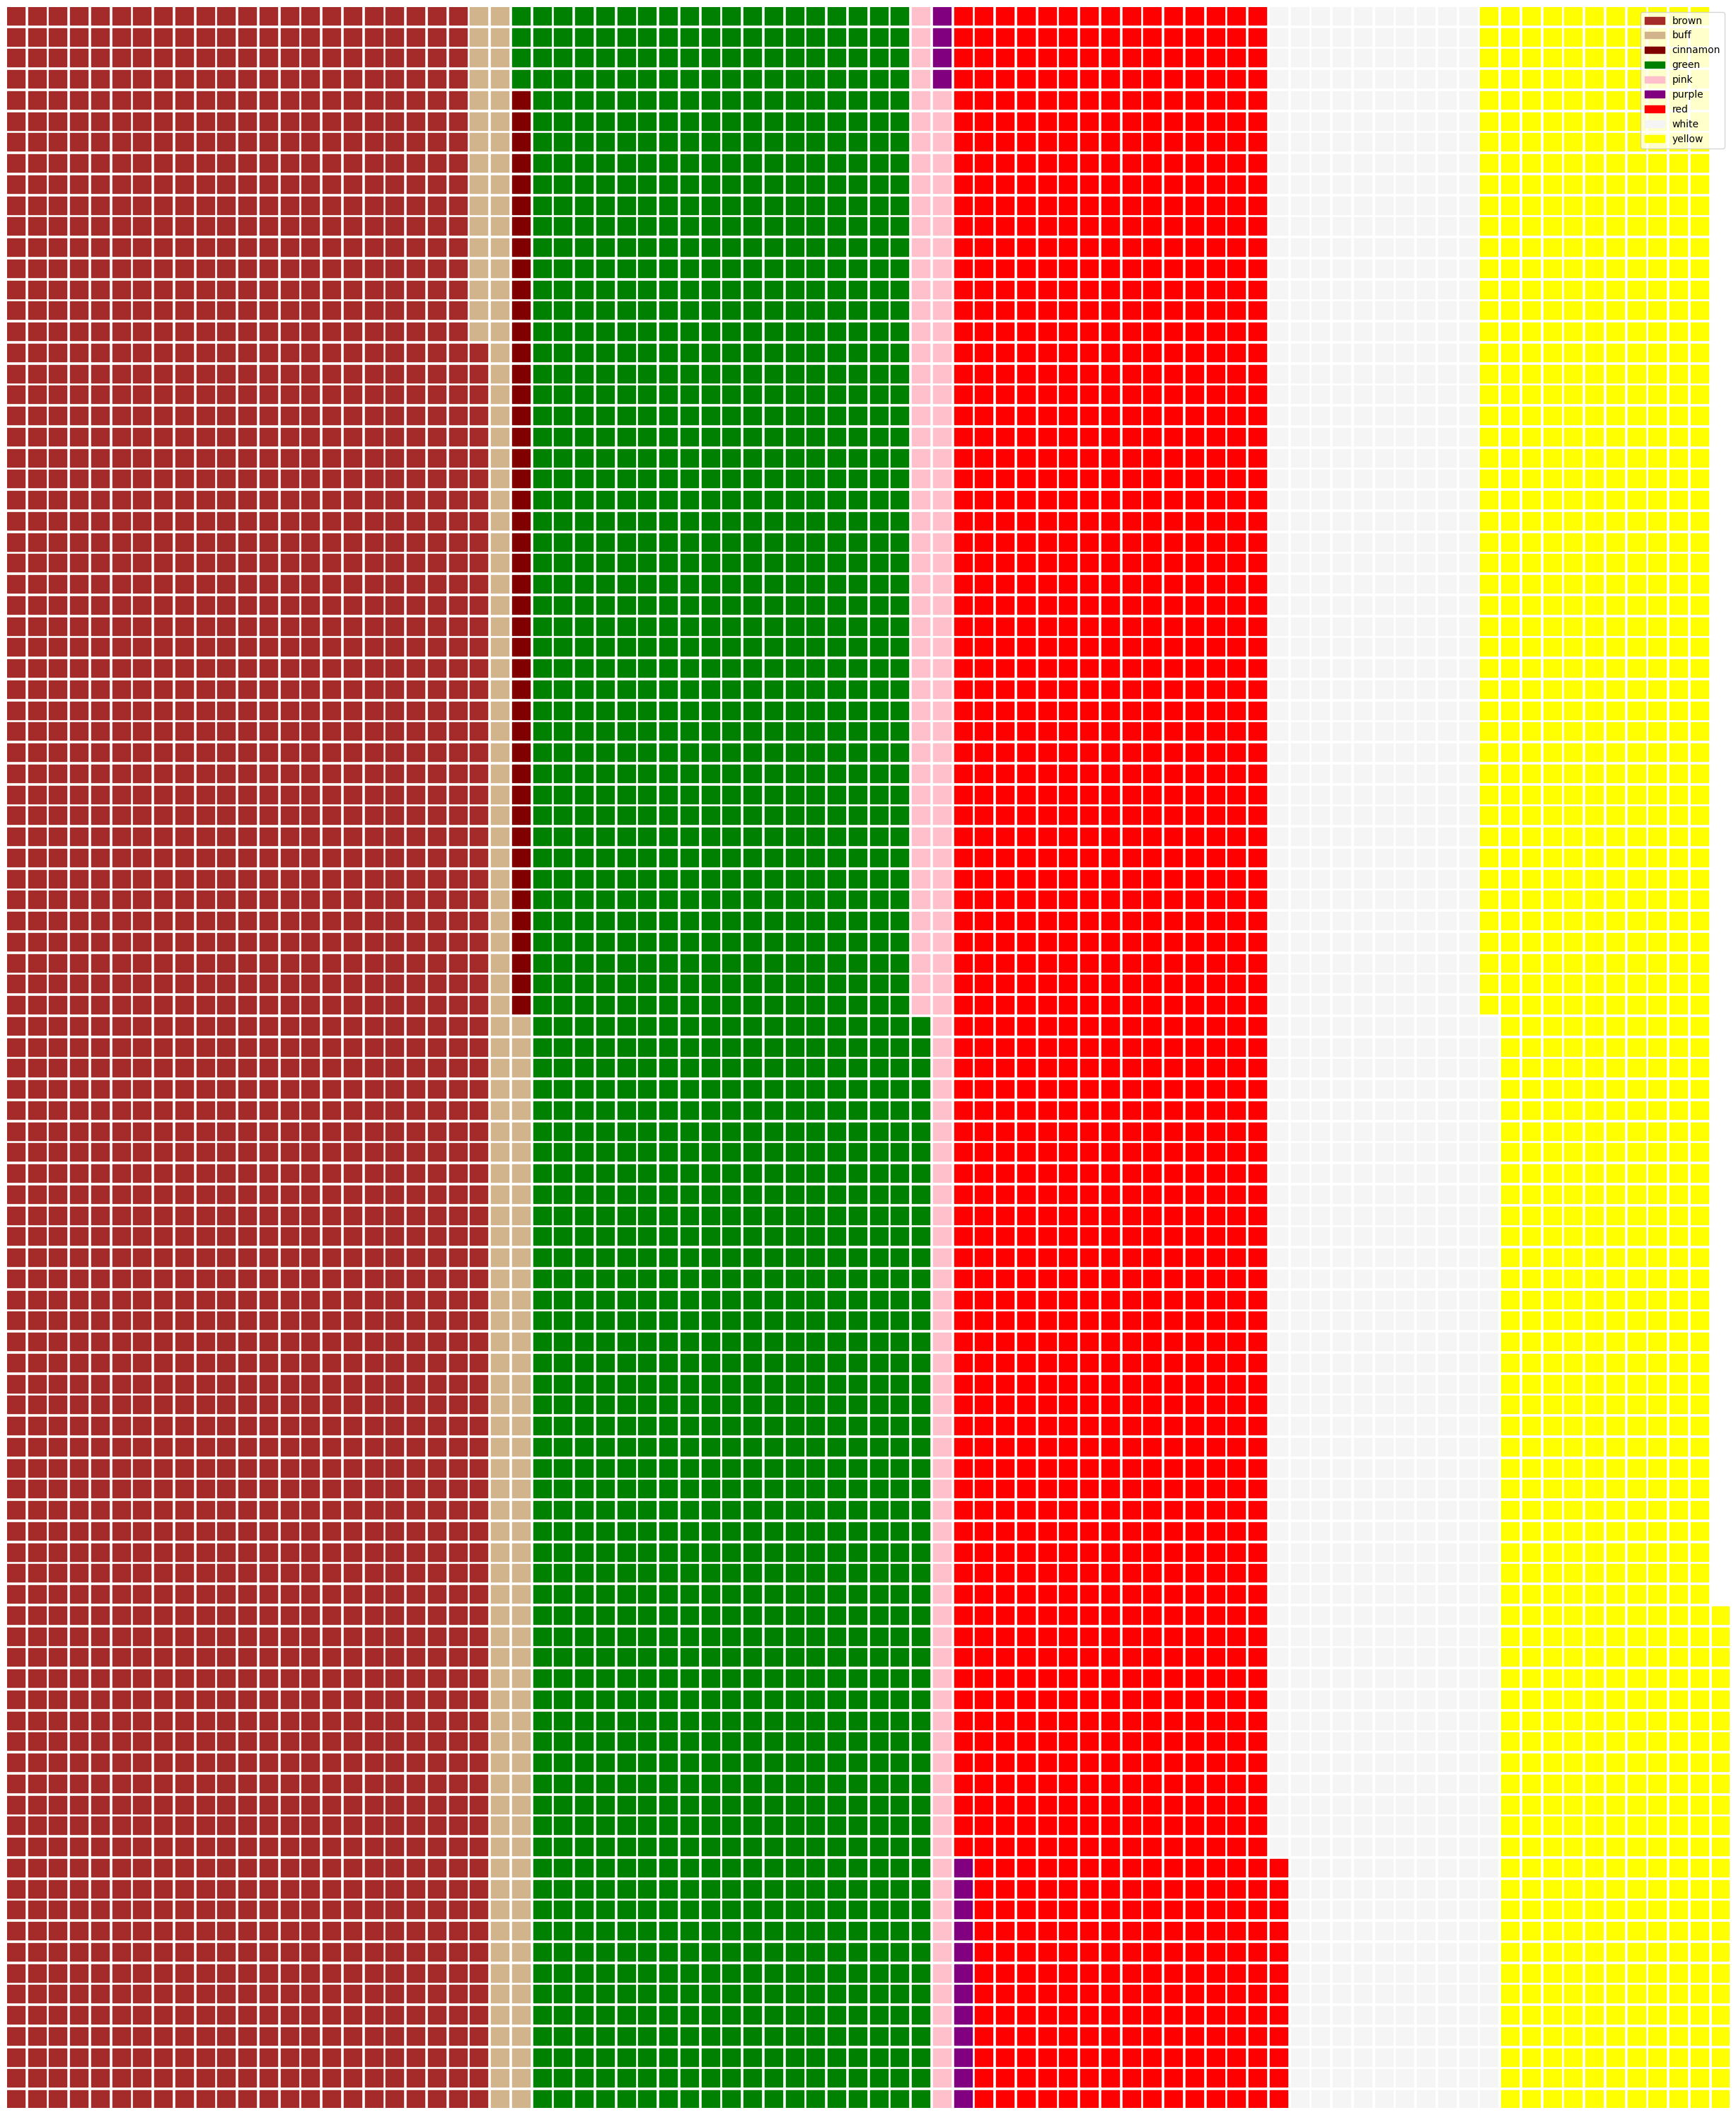

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
  
data ={'color': ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
    'amount': capcolor['class']
     }
  
df = pd.DataFrame(data)
  
fig = plt.figure(
    FigureClass = Waffle,
    rows = 100,
    values = df.amount,
    labels = list(df.color),
    figsize = (30,30),
    colors=["brown", "tan", "maroon", "green", "pink", "purple", "red", "whitesmoke", "yellow"],
)

### Scatterplots

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
honey = pd.read_csv('honey.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


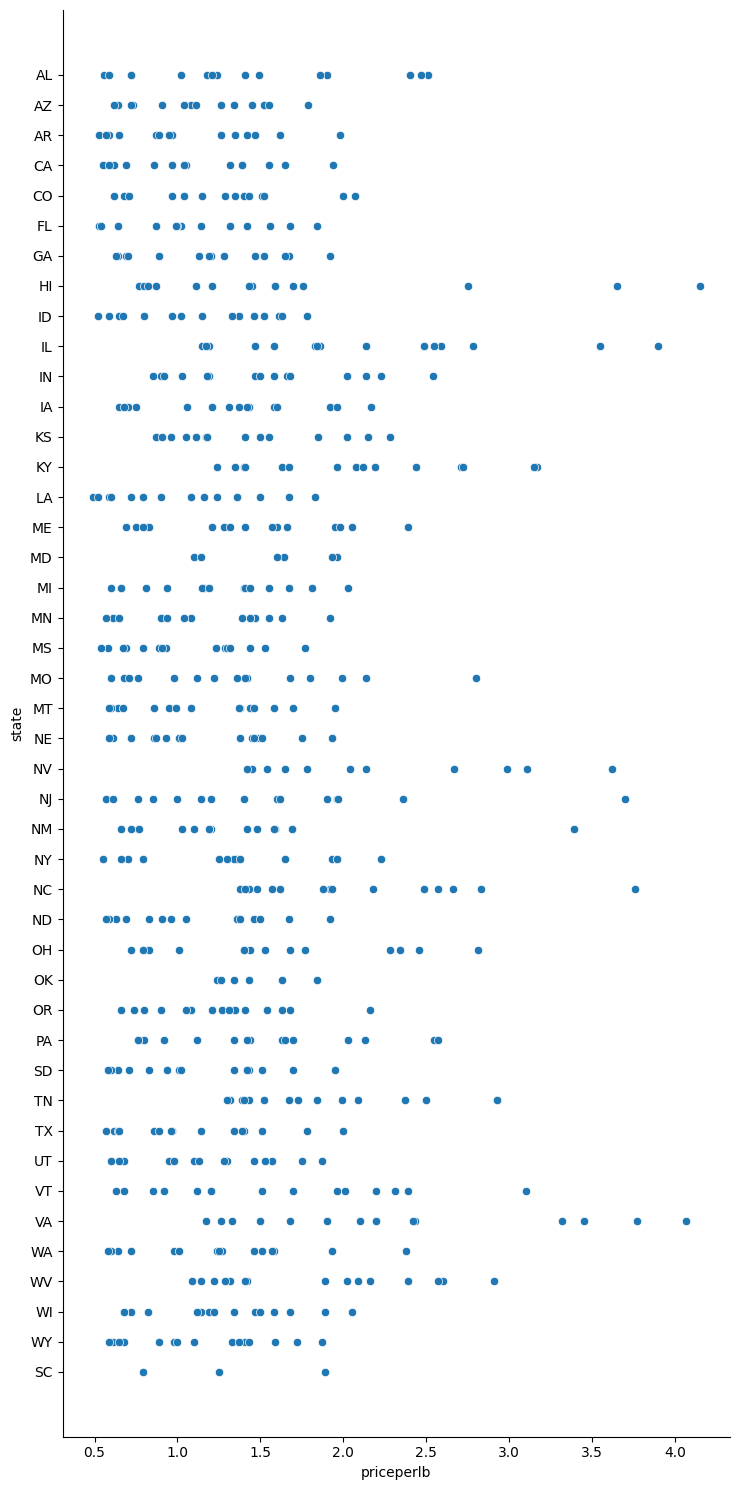

In [13]:
sns.relplot(x="priceperlb", y="state", data=honey, height=15, aspect=.5)

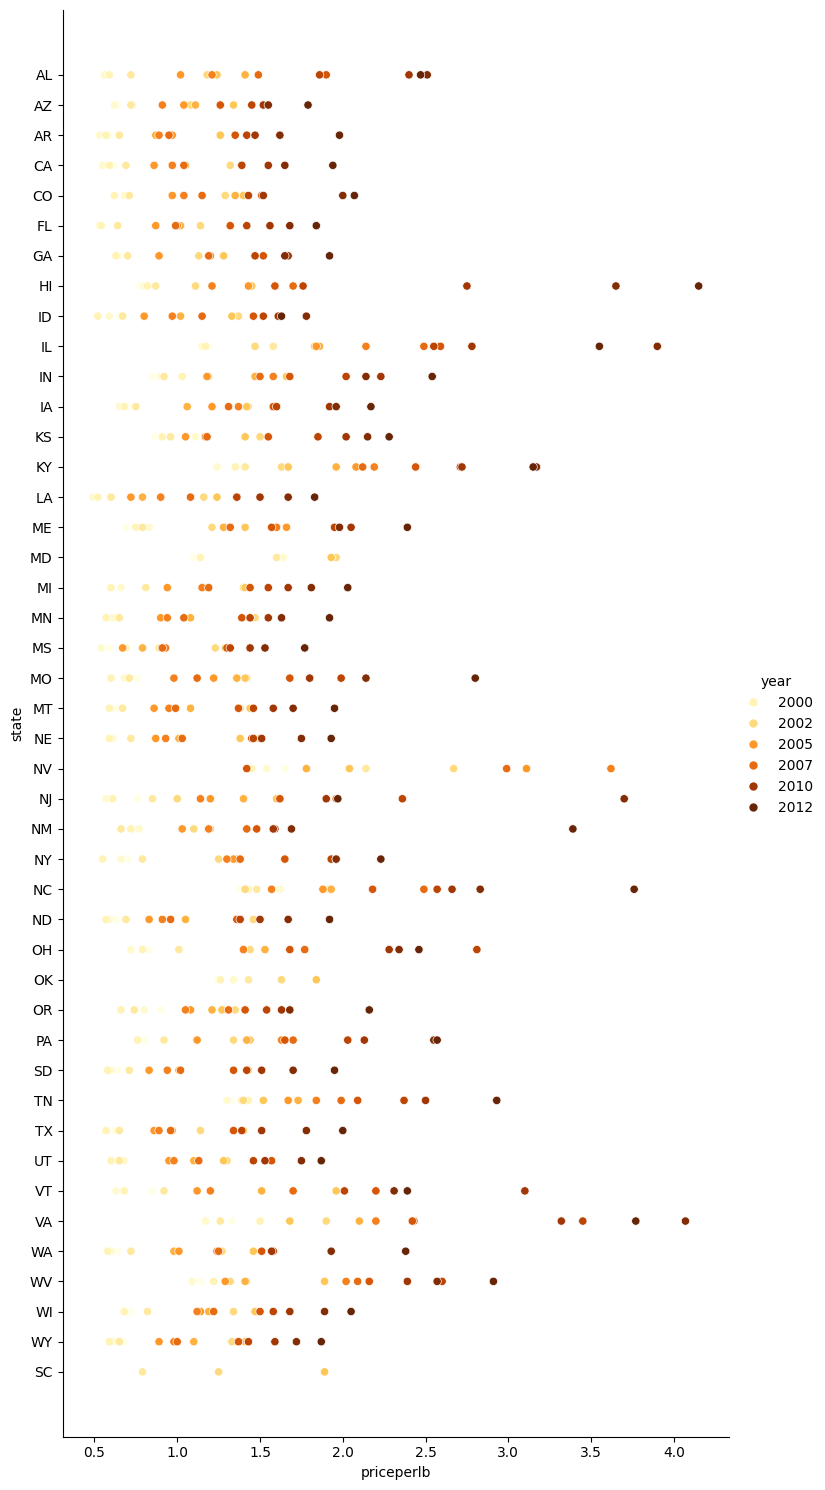

In [14]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="YlOrBr", data=honey, height=15, aspect=.5);

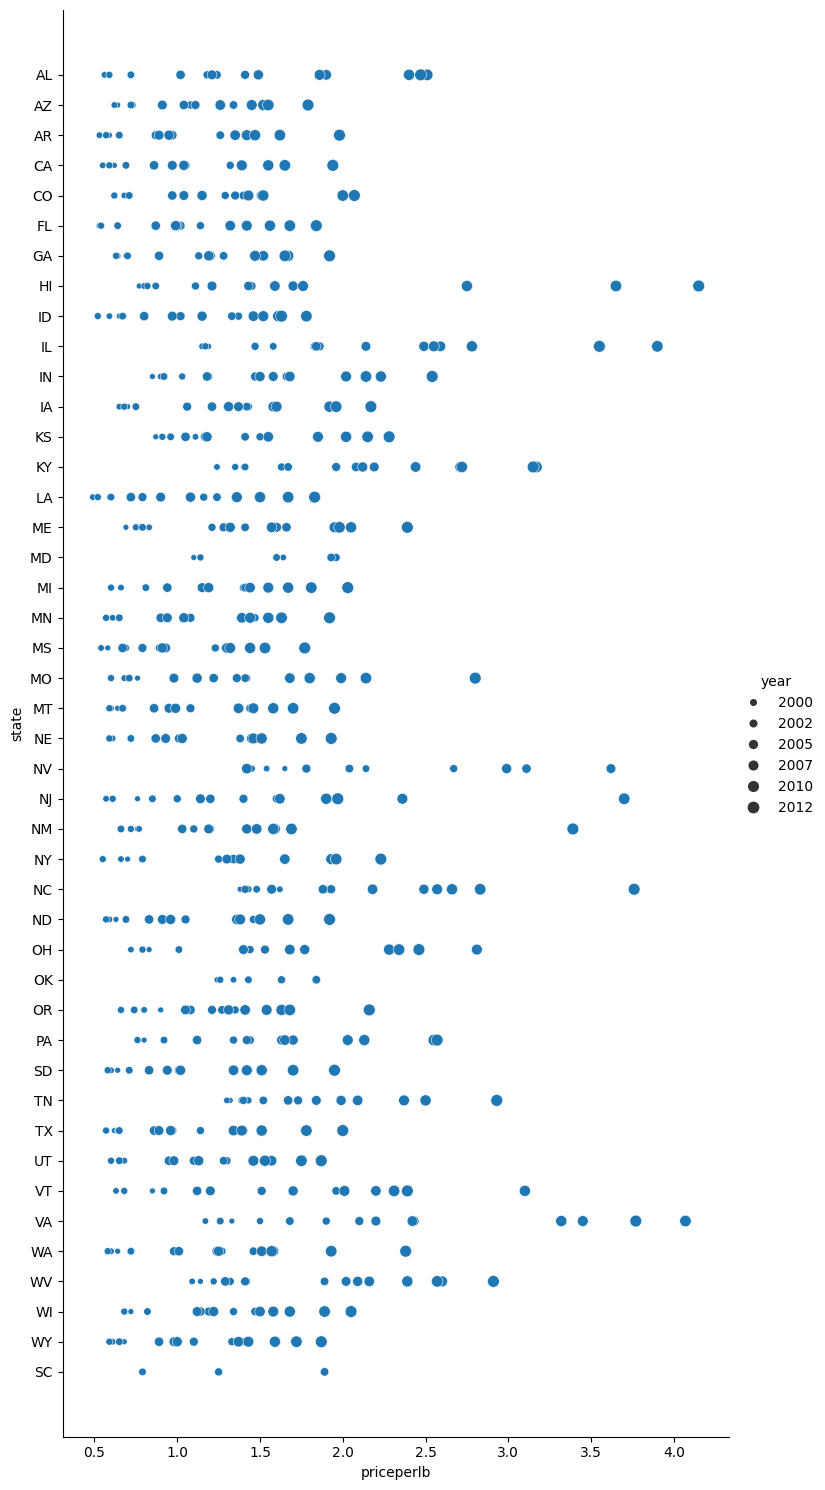

In [15]:
sns.relplot(x="priceperlb", y="state", size="year", data=honey, height=15, aspect=.5)

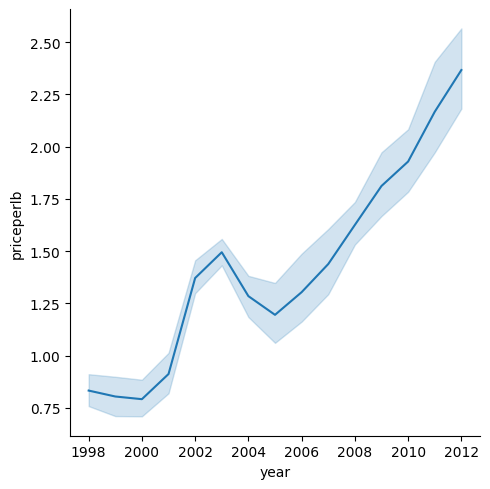

In [16]:
sns.relplot(x="year", y="priceperlb", kind="line", data=honey)

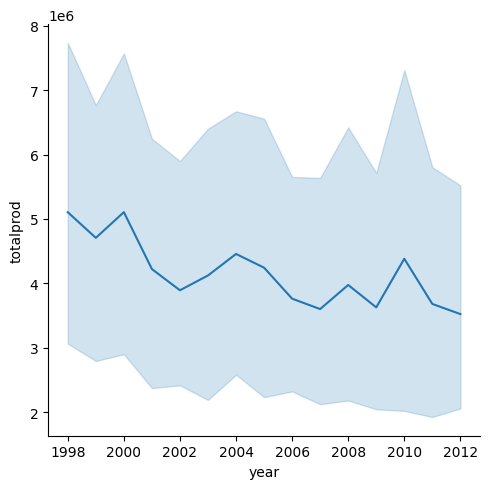

In [17]:
sns.relplot(x="year", y="totalprod", kind="line", data=honey)

### Facet grids

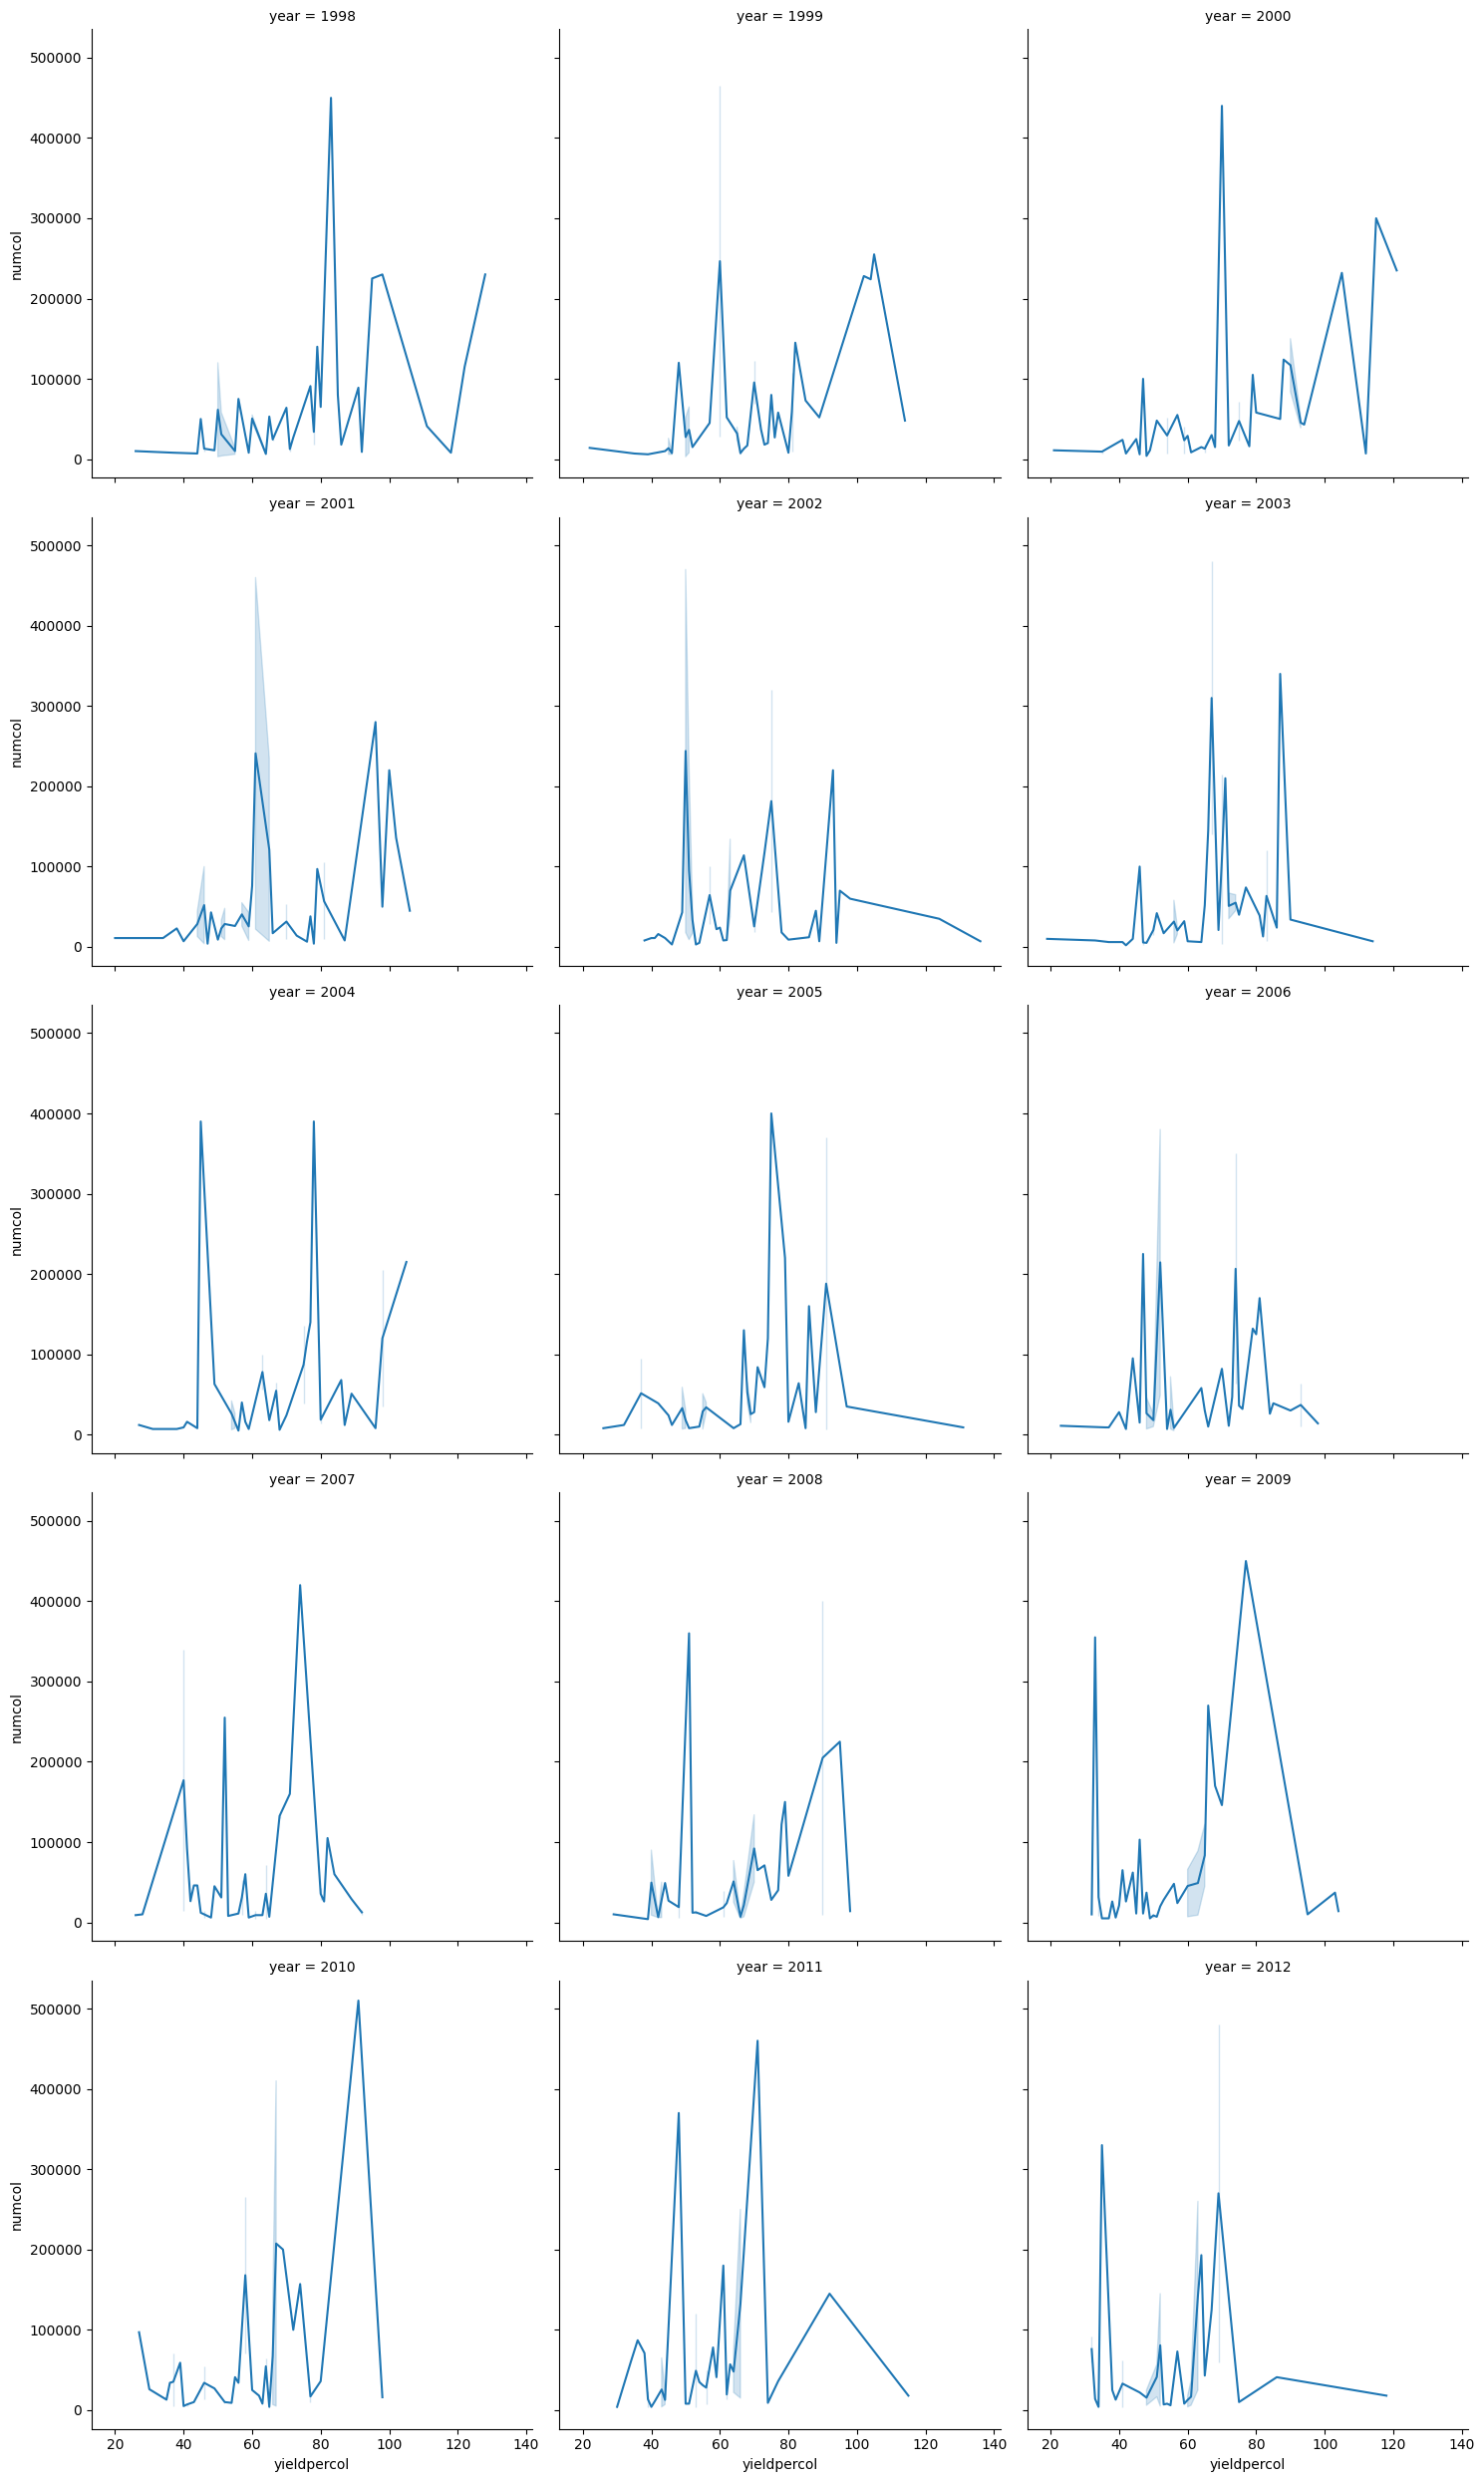

In [18]:
sns.relplot(
    data=honey, 
    x="yieldpercol", y="numcol",
    col="year", 
    col_wrap=3,
    kind="line")

### Dual-line Plots

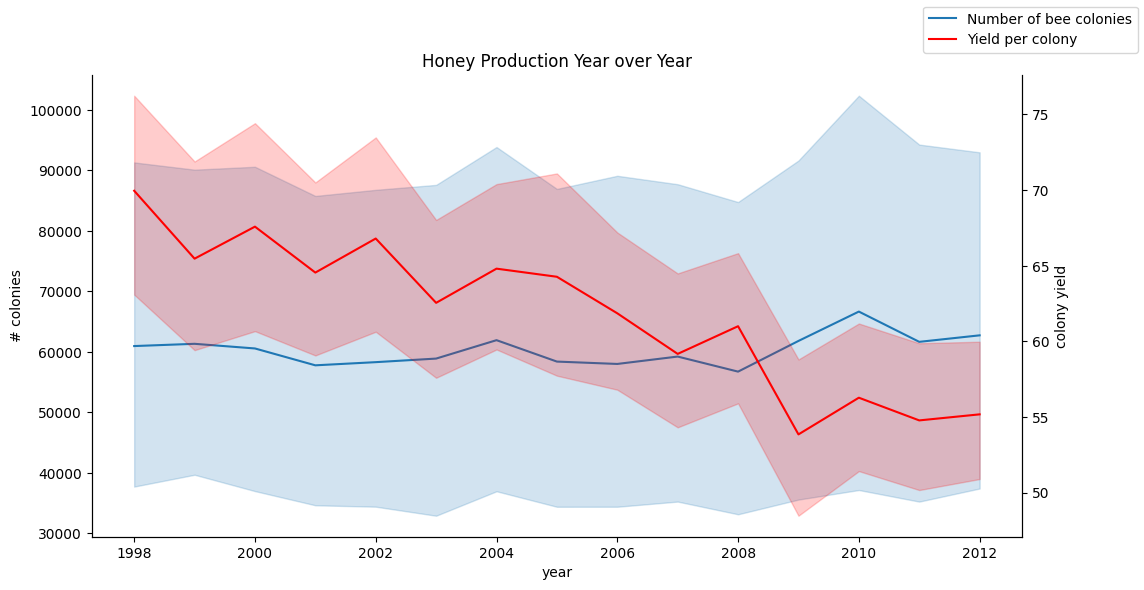

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=honey['year'], y=honey['numcol'], data=honey, 
                        label = 'Number of bee colonies', legend=False)
sns.despine()
plt.ylabel('# colonies')
plt.title('Honey Production Year over Year');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=honey['year'], y=honey['yieldpercol'], ax=ax2, color="r", 
                         label ='Yield per colony', legend=False) 
sns.despine(right=False)
plt.ylabel('colony yield')
ax.figure.legend()

### Making Meaningful Visualizations
### Project: Build a chart to show a network using D3.js

In [22]:
letters = [
    {'from': 'a', 'to': 'x'},
    {'from': 'b', 'to': 'y'},
    {'from': 'c', 'to': 'z'}
]

characters = ['x', 'y', 'z']

f = 0
t = 0
links = []

for i in range(len(letters)):
    for j in range(len(characters)):
        if characters[j] == letters[i]['from']:
            f = j
        if characters[j] == letters[i]['to']:
            t = j
    links.append({'sid': f, 'tid': t})

print(links)

[{'sid': 0, 'tid': 0}, {'sid': 0, 'tid': 1}, {'sid': 0, 'tid': 2}]
